In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('credits.csv')
df

,tmdb_id,title,cast,crew
0,574475,Final Destination Bloodlines,"[{'adult': False, 'gender': 1, 'id': 3480304, ...","[{'adult': False, 'gender': 2, 'id': 1181022, ..."
1,552524,Lilo & Stitch,"[{'adult': False, 'gender': 1, 'id': 3988423, ...","[{'adult': False, 'gender': 2, 'id': 1540069, ..."
2,1426776,STRAW,"[{'adult': False, 'gender': 1, 'id': 40036, 'k...","[{'adult': False, 'gender': 2, 'id': 80602, 'k..."
3,1087891,The Amateur,"[{'adult': False, 'gender': 2, 'id': 17838, 'k...","[{'adult': False, 'gender': 2, 'id': 969704, '..."
4,1087192,How to Train Your Dragon,"[{'adult': False, 'gender': 2, 'id': 2803710, ...","[{'adult': False, 'gender': 2, 'id': 69797, 'k..."
...,...,...,...,...
9993,579730,Sharks: Monster of the Media,[],"[{'adult': False, 'gender': 0, 'id': 1923163, ..."
9994,1062071,Proof of Us,"[{'adult': False, 'gender': 2, 'id': 1254052, ...","[{'adult': False, 'gender': 2, 'id': 2654331, ..."
9995,595228,Soorarai Pottru,"[{'adult': False, 'gender': 2, 'id': 85720, 'k...","[{'adult': False, 'gender': 2, 'id': 2531431, ..."
9996,1178574,Papa,"[{'adult': False, 'gender': 2, 'id': 940339, '...","[{'adult': False, 'gender': 2, 'id': 1194706, ..."


In [3]:
df.drop(columns='tmdb_id',inplace=True)
df

,title,cast,crew
0,Final Destination Bloodlines,"[{'adult': False, 'gender': 1, 'id': 3480304, ...","[{'adult': False, 'gender': 2, 'id': 1181022, ..."
1,Lilo & Stitch,"[{'adult': False, 'gender': 1, 'id': 3988423, ...","[{'adult': False, 'gender': 2, 'id': 1540069, ..."
2,STRAW,"[{'adult': False, 'gender': 1, 'id': 40036, 'k...","[{'adult': False, 'gender': 2, 'id': 80602, 'k..."
3,The Amateur,"[{'adult': False, 'gender': 2, 'id': 17838, 'k...","[{'adult': False, 'gender': 2, 'id': 969704, '..."
4,How to Train Your Dragon,"[{'adult': False, 'gender': 2, 'id': 2803710, ...","[{'adult': False, 'gender': 2, 'id': 69797, 'k..."
...,...,...,...
9993,Sharks: Monster of the Media,[],"[{'adult': False, 'gender': 0, 'id': 1923163, ..."
9994,Proof of Us,"[{'adult': False, 'gender': 2, 'id': 1254052, ...","[{'adult': False, 'gender': 2, 'id': 2654331, ..."
9995,Soorarai Pottru,"[{'adult': False, 'gender': 2, 'id': 85720, 'k...","[{'adult': False, 'gender': 2, 'id': 2531431, ..."
9996,Papa,"[{'adult': False, 'gender': 2, 'id': 940339, '...","[{'adult': False, 'gender': 2, 'id': 1194706, ..."


In [4]:
df.isnull().sum()

title    0
cast     0
crew     0
dtype: int64

In [5]:
cast_str=list(df['cast'])

In [6]:
crew_str=list(df['crew'])

In [7]:
from tqdm import tqdm
unwanted_data_in_cast=["id","profile_path","credit_","cast_"]
unwanted_data_in_crew=["id","profile_path","credit_"]
print('trim of cast string')

for num,i in tqdm(enumerate(cast_str)):
    for j in unwanted_data_in_cast:
        while True:
            if j in i:
                idx_first=i.index(j)
                tt=i[idx_first:]
                idx_second=tt.index(',')
                cast_str[num]=i.replace(i[idx_first:idx_first+idx_second]," ")
                i=cast_str[num]
            else:
                break


print('trim of crew string')
for num,i in tqdm(enumerate(crew_str)):
    for j in unwanted_data_in_crew:
        while True:
            if j in i:
                idx_first=i.index(j)
                tt=i[idx_first:]
                try:
                    idx_second=tt.index(',')
                except:
                    idx_second=idx_first+1
                crew_str[num]=i.replace(i[idx_first:idx_first+idx_second]," ")
                i=crew_str[num]
            else:
                
                break



trim of cast string


0it [00:00, ?it/s]

9998it [00:28, 354.81it/s]


trim of crew string


9998it [01:58, 84.55it/s] 


In [8]:
import re
# remove_data_cast=['adult','gender','known_for_department','original_name','name','popularity','character','order']
# remove_data_crew=['adult','gender','known_for_department','original_name','name','popularity','department','character','job']
print('remove punctuation in cast')
for num,i in tqdm(enumerate(cast_str)):
    cast_str[num] = re.sub(r'[^\w\s]', '', i)
    
print('remove punctuation in crew')
for num,i in tqdm(enumerate(crew_str)):
    crew_str[num] = re.sub(r'[^\w\s]', '', i)

remove punctuation in cast


9998it [00:04, 2014.18it/s]


remove punctuation in crew


9998it [00:09, 1015.81it/s]


In [9]:
print(cast_str[:10])
print()
print(crew_str[:10])

['adult False gender 1   known_for_department Acting name Kaitlyn Santa Juana original_name Kaitlyn Santa Juana popularity 100414     character Stefani Reyes   order 0 adult False gender 2   known_for_department Acting name Teo Briones original_name Teo Briones popularity 77667     character Charlie Reyes   order 1 adult False gender 1   known_for_department Acting name Rya Kihlstedt original_name Rya Kihlstedt popularity 28186     character Darlene Campbell   order 2 adult False gender 2   known_for_department Acting name Richard Harmon original_name Richard Harmon popularity 54843     character Erik   order 3 adult False gender 2   known_for_department Acting name Owen Patrick Joyner original_name Owen Patrick Joyner popularity 16206     character Bobby   order 4 adult False gender 1   known_for_department Acting name Anna Lore original_name Anna Lore popularity 83703     character Julia   order 5 adult False gender 2   known_for_department Acting name Alex Zahara original_name Alex 

In [10]:
df['cast']=cast_str
df['crew']=crew_str

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tf=TfidfVectorizer()
cast=df['cast']+" "+df['crew']
data=tf.fit_transform(cast)
print(data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4174671 stored elements and shape (9998, 490391)>
  Coords	Values
  (0, 251903)	0.2901114352552743
  (0, 307923)	0.290430768551485
  (0, 316435)	0.2901114352552743
  (0, 350712)	0.2901114352552743
  (0, 251335)	0.1090287008669981
  (0, 383575)	0.2901114352552743
  (0, 343466)	0.025801231281708113
  (0, 415967)	0.023907237526545354
  (0, 341809)	0.02949458579484675
  (0, 391362)	0.2901114352552743
  (0, 400717)	0.2901114352552743
  (0, 16044)	0.02007495960292706
  (0, 282685)	0.08342493856974284
  (0, 431520)	0.014584954485731431
  (0, 408481)	0.03047988684243556
  (0, 391236)	0.08342493856974284
  (0, 439729)	0.027206673295356927
  (0, 274853)	0.029666802221617636
  (0, 229076)	0.01743243362446088
  (0, 282820)	0.006560554061041186
  (0, 412977)	0.03551518528399426
  (0, 348652)	0.0372257276746658
  (0, 76360)	0.01775759264199713
  (0, 293291)	0.011887350748668922
  (0, 278847)	0.013840443163115066
  :	:
  (9997, 302802)	0.1

In [13]:
data.shape

(9998, 490391)

In [14]:
df['title']=df['title'].str.lower()
df

,title,cast,crew
0,final destination bloodlines,adult False gender 1 known_for_department Ac...,adult False gender 2 known_for_department Di...
1,lilo & stitch,adult False gender 1 known_for_department Ac...,adult False gender 2 known_for_department Di...
2,straw,adult False gender 1 known_for_department Ac...,adult False gender 2 known_for_department Ac...
3,the amateur,adult False gender 2 known_for_department Ac...,adult False gender 2 known_for_department Ed...
4,how to train your dragon,adult False gender 2 known_for_department Ac...,adult False gender 2 known_for_department Di...
...,...,...,...
9993,sharks: monster of the media,,adult False gender 0 known_for_department Di...
9994,proof of us,adult False gender 2 known_for_department Ac...,adult False gender 2 known_for_department So...
9995,soorarai pottru,adult False gender 2 known_for_department Ac...,adult False gender 2 known_for_department Ar...
9996,papa,adult False gender 2 known_for_department Ac...,adult False gender 2 known_for_department Di...


In [15]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2,random_state=42)
x_label=pca.fit_transform(data)

x_label

array([[ 0.17479882, -0.05477538],
       [ 0.03273186, -0.01778337],
       [-0.0107223 , -0.06964938],
       ...,
       [-0.03076703, -0.01866948],
       [-0.11087987, -0.07540843],
       [-0.27038275,  0.00413561]])

C:\Users\RAJPRABU\AppData\Local\Temp\ipykernel_13016\2256324323.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_label[:, 0], x_label[:, 1],


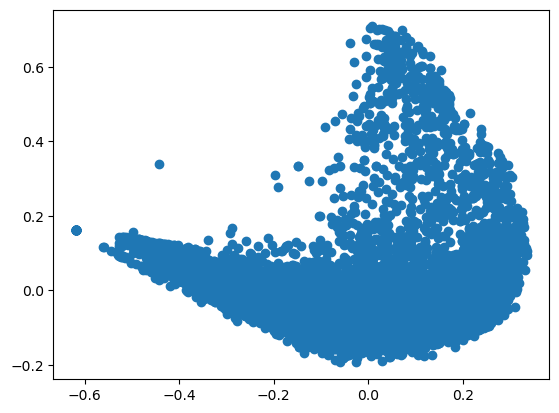

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x_label[:, 0], x_label[:, 1],
                     cmap='rainbow')

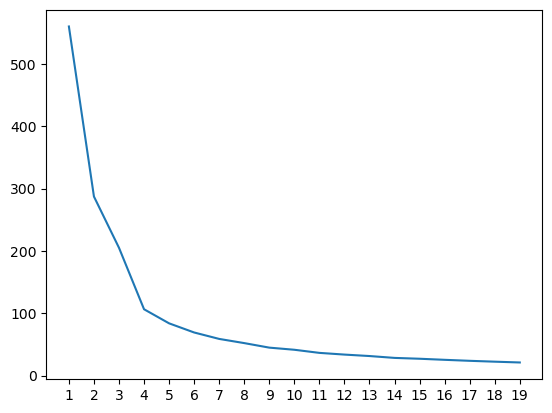

In [17]:
from sklearn.cluster import KMeans
k=[]
value=range(1,20)
for i in value:
    kmeans=KMeans(n_clusters=i,n_init='auto')
    kmeans.fit(x_label)
    k.append(kmeans.inertia_)

plt.plot(value,k)
plt.xticks(value)
plt.show()

In [18]:
final_means=KMeans(n_clusters=3)
final_means.fit_predict(x_label)

final_labels=final_means.labels_
final_labels.max()

2

In [19]:
final_labels.min()

0

In [20]:
df['clustered_label']=final_labels


In [21]:
centroid=final_means.cluster_centers_

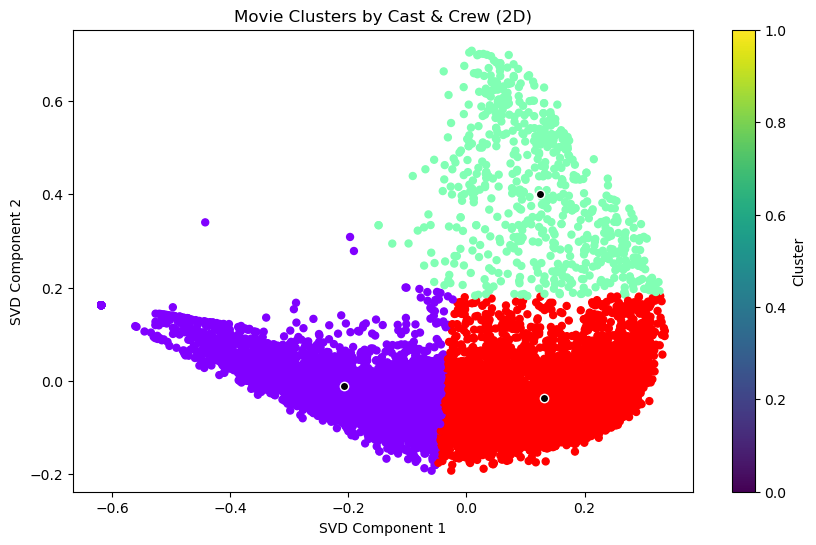

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(x_label[:, 0], x_label[:, 1], c=final_labels, cmap='rainbow', s=25)
plt.scatter(centroid[:, 0],centroid[:, 1],c='black',edgecolors='white')
plt.title('Movie Clusters by Cast & Crew (2D)')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.colorbar(label='Cluster')

In [23]:
from sklearn.metrics import silhouette_score

ss=silhouette_score(x_label,final_means.labels_)
print('accuracy:',ss)

accuracy: 0.5018370528206522


In [25]:
import random
movie_name=input('enter movie name:')
if df[df['title']==movie_name]['title'].any():
    print(f"your movie is founded : {df[df['title']==movie_name]['title'].iloc[0]}")
else:
    print('this movie is not in app..!!')
recommended_num=df[df['title']==movie_name]['clustered_label'].iloc[0]
print('recommended for u:')
recommended_movies=list(df[df['clustered_label']==recommended_num]['title'].head(20))
if movie_name in recommended_movies:
    recommended_movies.remove(movie_name)
random.shuffle(recommended_movies)
for i,movies in enumerate(recommended_movies,start=1):
    print(i," ",movies)



your movie is founded : karate kid: legends
recommended for u:
1   snow white
2   taandob
3   kiff lore of the ring light
4   3ão: an endless story
5   utopia
6   candle in the tomb: the worm valley
7   crazy lizard
8   possessions
9   diablo
10   mikaela
11   laila
12   predator: killer of killers
13   kayara
14   hunt the wicked
15   fear below
16   mikaela
17   the ugly stepsister
18   párvulos: children of the apocalypse
19   life after fighting
